In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#path = "C:/Data Science/Python/Python for Machine Learning/Class 2 - Normalization, regression/pyformlclass2regressionwithnormalizationandpolyfi/Student/"
df1 = pd.read_csv(path + "pge_electric_interval_data.csv", sep = ",")

In [5]:
df1.head(5)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,2018-10-26,00:00,00:14,0.08,kWh,$0.02,NaN
1,Electric usage,2018-10-26,00:15,00:29,0.08,kWh,$0.02,NaN
2,Electric usage,2018-10-26,00:30,00:44,0.08,kWh,$0.02,NaN
3,Electric usage,2018-10-26,00:45,00:59,0.08,kWh,$0.02,NaN
4,Electric usage,2018-10-26,01:00,01:14,0.09,kWh,$0.02,NaN


In [6]:
df1.columns

Index(['TYPE', 'DATE', 'START TIME', 'END TIME', 'USAGE', 'UNITS', 'COST',
       'NOTES'],
      dtype='object')

In [7]:
df1 = df1.rename(columns={'END TIME':'END_TIME', 'START TIME':'START_TIME' })
df1.head()

,TYPE,DATE,START_TIME,END_TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,2018-10-26,00:00,00:14,0.08,kWh,$0.02,NaN
1,Electric usage,2018-10-26,00:15,00:29,0.08,kWh,$0.02,NaN
2,Electric usage,2018-10-26,00:30,00:44,0.08,kWh,$0.02,NaN
3,Electric usage,2018-10-26,00:45,00:59,0.08,kWh,$0.02,NaN
4,Electric usage,2018-10-26,01:00,01:14,0.09,kWh,$0.02,NaN


In [8]:
df1.tail()

,TYPE,DATE,START_TIME,END_TIME,USAGE,UNITS,COST,NOTES
3167,Electric usage,2018-11-27,22:45,22:59,0.30,kWh,$0.09,NaN
3168,Electric usage,2018-11-27,23:00,23:14,0.24,kWh,$0.07,NaN
3169,Electric usage,2018-11-27,23:15,23:29,0.24,kWh,$0.07,NaN
3170,Electric usage,2018-11-27,23:30,23:44,0.24,kWh,$0.07,NaN
3171,Electric usage,2018-11-27,23:45,23:59,0.24,kWh,$0.07,NaN


In [9]:
df1.describe()

,USAGE,NOTES
count,3172.000000,0.0
mean,0.172396,NaN
std,0.132056,NaN
min,0.020000,NaN
25%,0.070000,NaN
50%,0.130000,NaN
75%,0.250000,NaN
max,0.810000,NaN


In [11]:
X = [] # time, 3172 readings
y = [] # Usage -- reading from csv file

X = [i*15 for i in range(3172)]

In [13]:
print(X)

[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440, 1455, 1470, 1485, 1500, 1515, 1530, 1545, 1560, 1575, 1590, 1605, 1620, 1635, 1650, 1665, 1680, 1695, 1710, 1725, 1740, 1755, 1770, 1785, 1800, 1815, 1830, 1845, 1860, 1875, 1890, 1905, 1920, 1935, 1950, 1965, 1980, 1995, 2010, 2025, 2040, 2055, 2070, 2085, 2100, 2115, 2130, 2145, 2160, 2175, 2190, 2205, 2220, 2235, 2250, 2265, 2280, 2295, 2310, 2325, 2340, 2355, 2370, 2385, 2400, 2415, 2430, 2445, 2460, 2475, 2490, 2505, 2520, 2535, 2550, 2565, 2580, 2595, 2610, 2625, 2640, 2655, 2670, 

In [ ]:
Y = list(df1.USAGE)

In [25]:
print(Y[0:5])

[0.08, 0.08, 0.08, 0.08, 0.09]


In [28]:
print(Y[-5:-1])

[0.3, 0.24, 0.24, 0.24]


In [29]:
print(min(Y))

0.02


In [30]:
print(max(Y))

0.81


In [45]:
# Polynomial fit using Numpy
Order = 4
fit = np.polyfit(X,Y,Order)
print("Coeff ", fit)
fit1 = np.poly1d(fit,variable="t") 
print(fit1)
y1 = fit1(X)

Coeff  [ 3.82606191e-19 -4.32112717e-14  1.50307539e-09 -1.39987709e-05
  1.42627548e-01]
           4             3             2
3.826e-19 t - 4.321e-14 t + 1.503e-09 t - 1.4e-05 t + 0.1426


In [51]:
# Polynomial fit using Numpy
Order = 6
fit = np.polyfit(X,Y,Order)
print("Coeff ", fit)
fit1 = np.poly1d(fit,variable="t") 
print(fit1)
y1 = fit1(X)

Coeff  [ 4.43260300e-28  1.42683914e-23 -5.41684717e-18  2.59788874e-13
 -4.41579317e-09  2.82957976e-05  7.34985175e-02]
           6             5             4             3             2
4.433e-28 t + 1.427e-23 t - 5.417e-18 t + 2.598e-13 t - 4.416e-09 t + 2.83e-05 t + 0.0735


In [57]:
# Polynomial fit using Numpy
Order = 10
fit = np.polyfit(X,Y,Order)
print("Coeff ", fit)
fit1 = np.poly1d(fit,variable="t") 
print(fit1)
y1 = fit1(X)

Coeff  [-2.21810937e-44  6.54334116e-39 -8.30605888e-34  5.87621623e-29
 -2.51932704e-24  6.69617473e-20 -1.08904030e-15  1.03565622e-11
 -5.25894825e-08  1.20555801e-04  3.60596978e-02]
            10             9             8             7             6
-2.218e-44 t  + 6.543e-39 t - 8.306e-34 t + 5.876e-29 t - 2.519e-24 t
              5             4             3             2
 + 6.696e-20 t - 1.089e-15 t + 1.036e-11 t - 5.259e-08 t + 0.0001206 t + 0.03606


In [71]:
# Polynomial fit using Numpy
Order = 12
fit = np.polyfit(X,Y,Order)
print("Coeff ", fit)
fit1 = np.poly1d(fit,variable="t") 
print(fit1)
y1 = fit1(X)

Coeff  [ 1.48925629e-51 -4.39128861e-46  5.68445156e-41 -4.24348580e-36
  2.01749436e-31 -6.36500236e-27  1.34636010e-22 -1.88518595e-18
  1.68436122e-14 -8.95556070e-11  2.49086269e-07 -2.74988047e-04
  1.63816328e-01]
           12             11             10             9             8
1.489e-51 t  - 4.391e-46 t  + 5.684e-41 t  - 4.243e-36 t + 2.017e-31 t
              7             6             5             4             3
 - 6.365e-27 t + 1.346e-22 t - 1.885e-18 t + 1.684e-14 t - 8.956e-11 t
              2
 + 2.491e-07 t - 0.000275 t + 0.1638


In [ ]:
# Equation = 4.43260300e-28t**6 + 1.42683914e-23t**5 + -5.41684717e-18t**4 + 2.59788874e-13t**3 + 
#            -4.41579317e-09t**2 + 2.82957976e-05t + 7.34985175e-02


In [72]:
# Using polynomial equation, find the value of I for time interval of 5 seconds
y_calculated = []
for val in range(0,47565,5):
    y_calculated.append(fit1(val))  

In [73]:
# print to check
print(y_calculated[0:5])
print(len(y_calculated))
print(len(X))

[0.16381632845473923, 0.16244760419042303, 0.16109126722003692, 0.1597472507549744, 0.15841548825787255]
9513
3172


In [74]:
nums = []
for kk in range(0,47565,5):
    nums.append(kk)

In [75]:
nums[0:5]

[0, 5, 10, 15, 20]

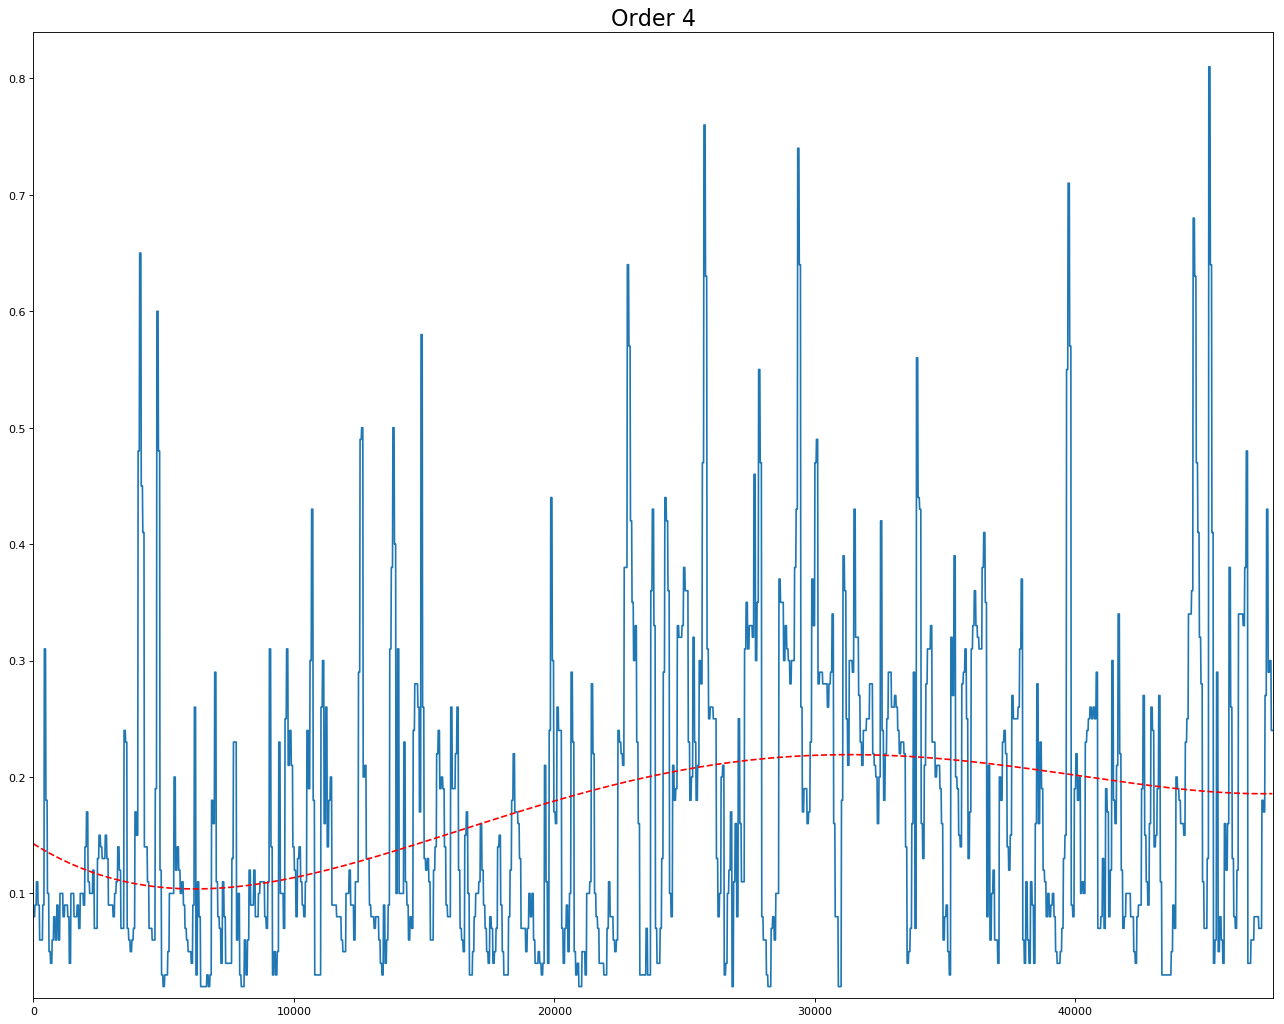

In [50]:
# create plot of predicted vs. actual
fig=plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(X,Y,'-')
plt.plot(nums,y_calculated,'--', color='r')
plt.axis([0,47600,0.01,.84])
plt.title("Order 4",fontsize = 20)
plt.show()

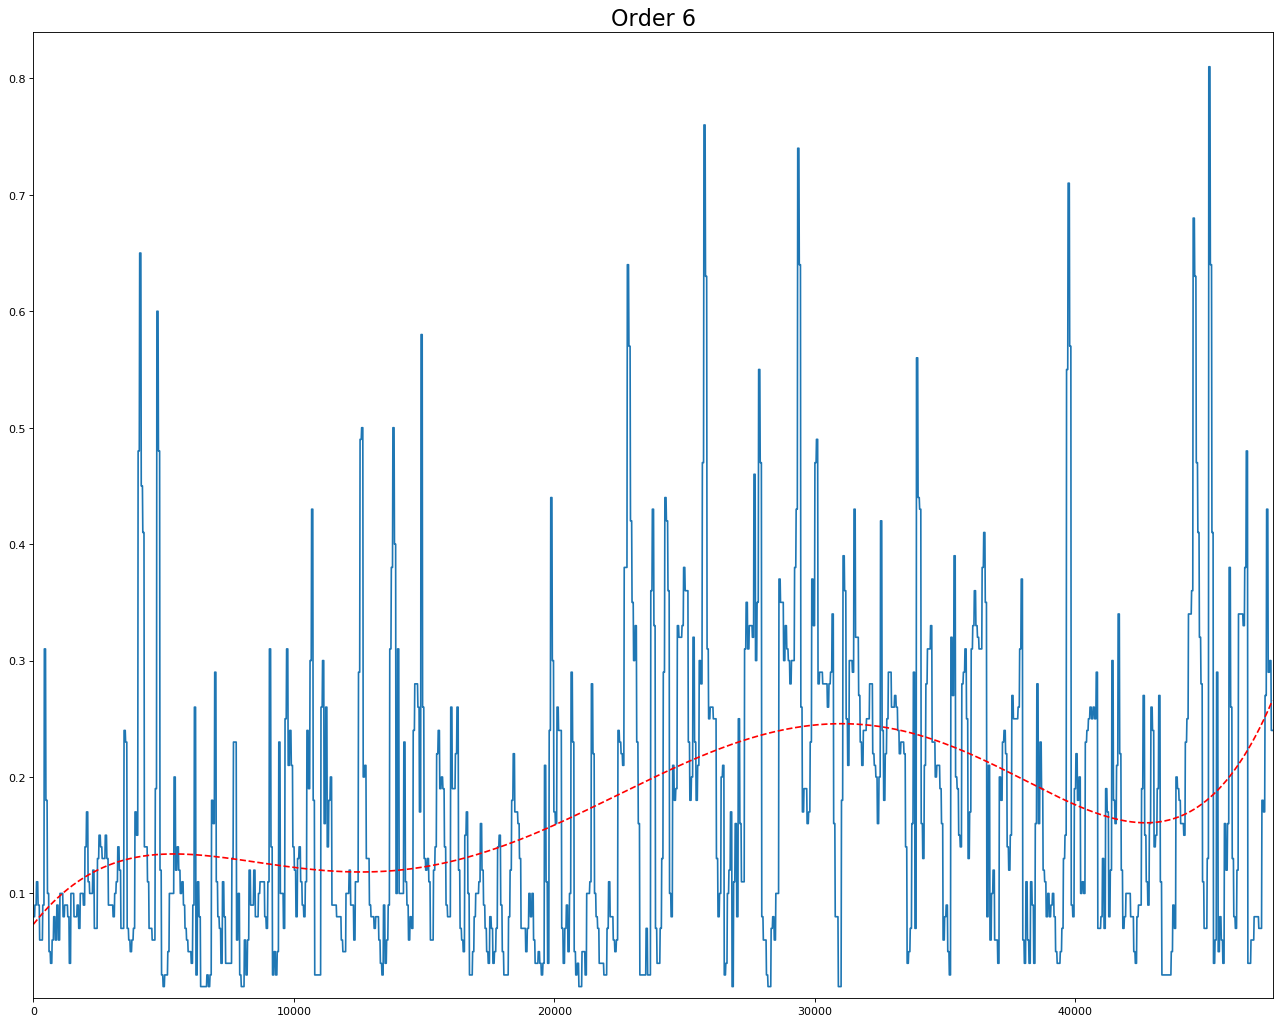

In [56]:
# create plot of predicted vs. actual
fig=plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(X,Y,'-')
plt.plot(nums,y_calculated,'--', color='r')
plt.axis([0,47600,0.01,.84])
plt.title("Order 6",fontsize = 20)
plt.show()

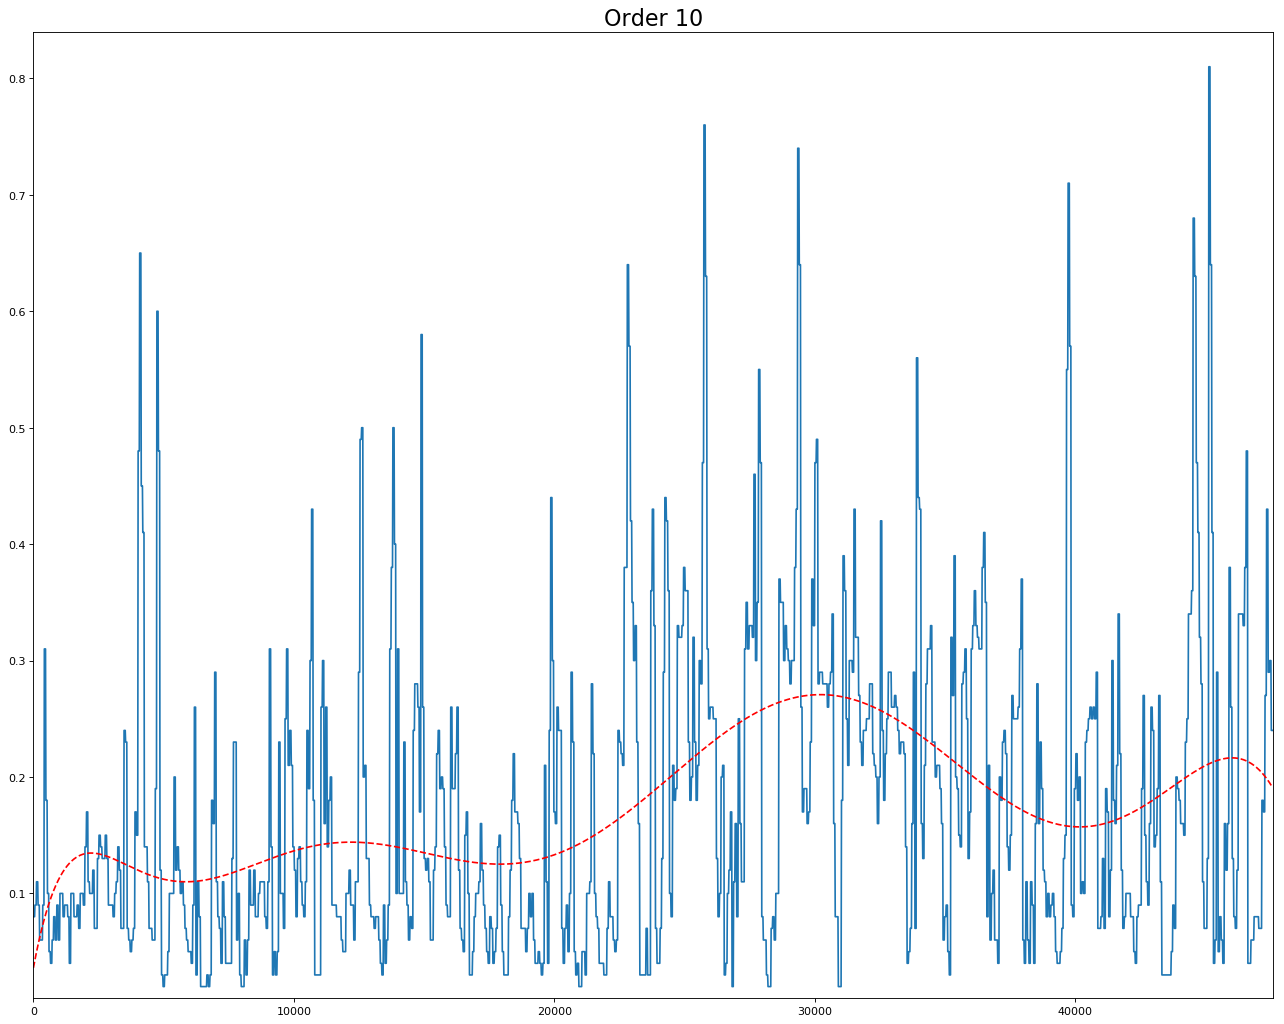

In [64]:
# create plot of predicted vs. actual
fig=plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(X,Y,'-')
plt.plot(nums,y_calculated,'--', color='r')
plt.axis([0,47600,0.01,0.84])
plt.title("Order 10",fontsize = 20)
plt.show()

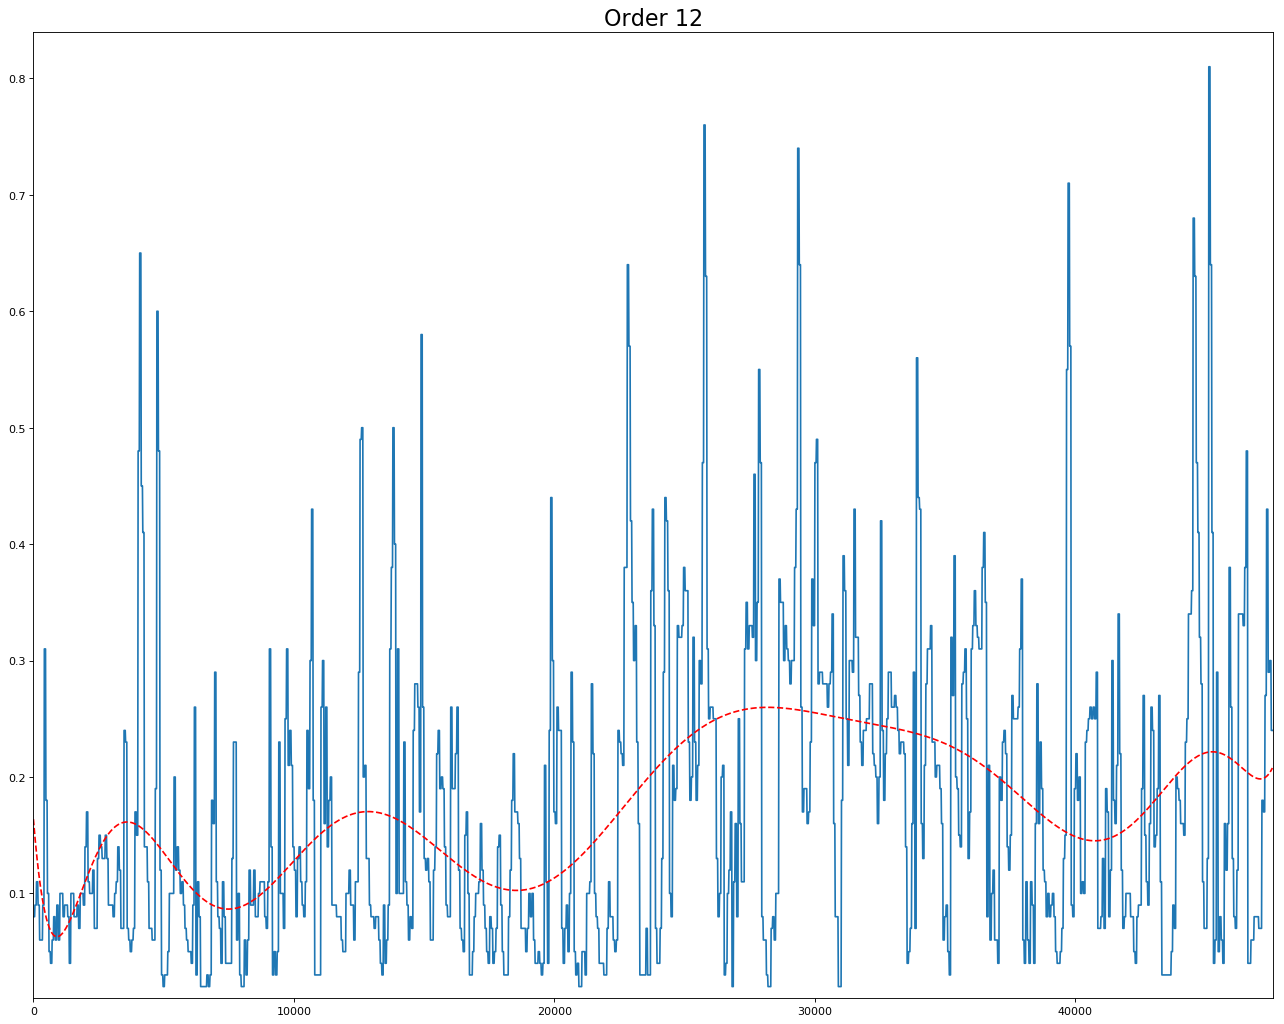

In [76]:
# create plot of predicted vs. actual
fig=plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(X,Y,'-')
plt.plot(nums,y_calculated,'--', color='r')
plt.axis([0,47600,0.01,.84])
plt.title("Order 12",fontsize = 20)
plt.show()

In [65]:
# OK, now predict values for 50000 and 60000
print(fit1(50000))
print(fit1(60000))

-0.0428050307305134
-14.968460279740963


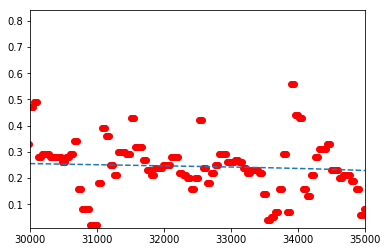

In [77]:
# Zoom in to see details
plt.plot(X,Y,'ro')
plt.plot(nums,y_calculated,'--')
plt.axis([30000,35000,0.01,0.84])
plt.show()